Time elapsed: 0.02 seconds
Question 1: Counts the number of Non Blank Values in Rows of a df
Your answer: df.count()
Time taken for this answer: 17.61 seconds
Correct!
Formal Explanation: Counts non-null values in each column of a DataFrame.
Time elapsed: 17.63 seconds
Question 2: Create a histogram plot of the 'data'  on the axes . Set the number of bins to 30 
Your answer: ax.hist(data,bins=30)
Time taken for this answer: 23.24 seconds
Correct!
Formal Explanation: Plots a histogram with a specified number of bins.
Time elapsed: 40.87 seconds
Question 3: Write a Python code snippet to plot the x array against itself on the ax axes object  and set the label of the line to "linear"
Your answer: ax.plot(x,x,label='linear')
Time taken for this answer: 20.63 seconds
Correct!
Formal Explanation: Plots a line on the `ax` object with `x` values on both the x-axis and y-axis, and labels the line as 'linear'.
Time elapsed: 61.51 seconds
Question 4: Read the clipborard
Your answer: pd.read_clipb

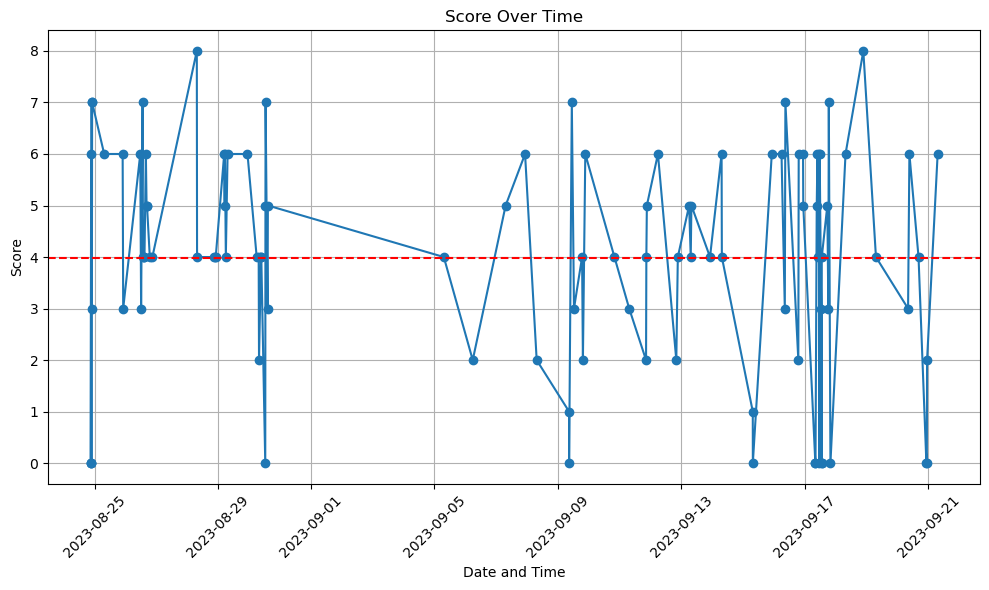

In [1]:
import pandas as pd
import time
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# Load the main question set from the 'data' sheet
file_path = "data.xlsx"
questions_df = pd.read_excel(file_path, sheet_name="data")

# Load previously asked questions from the 'history' sheet
try:
    asked_questions_df = pd.read_excel("asked_questions.xlsx", sheet_name="history")[["Questions", "Answer","explanation"]]
except FileNotFoundError:
    asked_questions_df = pd.DataFrame(columns=["Questions", "Answer","explanation"])

def get_question_mix(total_questions):
    old_questions = int(0.3 * total_questions)
    new_questions = total_questions - old_questions
    
    if len(asked_questions_df) == 0:  # Check if the 'asked_questions_df' is empty
        combined_df = questions_df.sample(total_questions, replace=False)
        return combined_df
    
    old_df = asked_questions_df.sample(old_questions, replace=True)
    new_df = questions_df[~questions_df["Questions"].isin(old_df["Questions"])]
    
    combined_df = pd.concat([old_df, new_df.sample(new_questions, replace=False)])
    return combined_df.sample(total_questions)
def quiz_game():
    global asked_questions_df
    score = 0
    quiz_start_time = time.time()
    
    questions_for_this_round = get_question_mix(10)
    
    quit_flag = False

    for i, (index, question) in enumerate(questions_for_this_round.iterrows()):
        print("===========================================")
        if quit_flag:
            break

        elapsed_time = time.time() - quiz_start_time
        print(f"Time elapsed: {elapsed_time:.2f} seconds")

        print(f"Question {i + 1}: {question['Questions']}")
        
        a=0
        while True:        
            start_time = time.time()
            user_answer = input("Your answer: ")
            end_time = time.time()

            time_taken = end_time - start_time
            print(f"Time taken for this answer: {time_taken:.2f} seconds")

            correct_answer = str(question["Answer"]) if pd.notna(question["Answer"]) else ""

            if user_answer.strip().lower() == "quit":
                print(f"\nYou chose to quit! Your current score is: {score} out of {i+1} questions asked.")
                quit_flag = True
                break
            elif user_answer.strip().lower() == "r":
                break

            if user_answer.strip() == correct_answer:
                print("Correct!")
                print("Formal Explanation:",question["explanation"])

                if a==0:
                    score += 1
                    break
                break
            else:
                print(f"Sorry, the correct answer is: {correct_answer}")
                print(f"Length of your answer:{len(user_answer)}")
                print(f"Length of the correct Answer is:{len(correct_answer)}")
                a =1


    quiz_end_time = time.time()
    total_time_taken = quiz_end_time - quiz_start_time

    print(f"\nGame Over! Your final score is: {score} out of 10.")
    print(f"Total time taken for the quiz: {total_time_taken:.2f} seconds.")
    
    # Append asked questions for this round to the history
    asked_questions_df = pd.concat([asked_questions_df, questions_for_this_round[["Questions", "Answer","explanation"]]]).reset_index(drop=True)
    asked_questions_df=asked_questions_df.drop_duplicates()
    asked_questions_df=pd.merge(left=asked_questions_df,right=questions_df,how='inner',on='Questions',validate='one_to_one')
    asked_questions_df=asked_questions_df.rename(columns={'Answer_y':'Answer'})
    asked_questions_df=asked_questions_df.rename(columns={'explanation_y':'explanation'})
    asked_questions_df=asked_questions_df.loc[:,['Questions','Answer','explanation']]
    asked_questions_df.to_excel("asked_questions.xlsx", sheet_name="history", index=False)

    def append_score_to_excel(score):
        now = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
        new_data = pd.DataFrame({"Date and Time": [now], "Score": [score]})
        
        file_name = "scores.xlsx"
        try:
            existing_data = pd.read_excel(file_name)
        except FileNotFoundError:
            existing_data = pd.DataFrame(columns=["Date and Time", "Score"])

        updated_data = pd.concat([existing_data, new_data], ignore_index=True)
        updated_data.to_excel(file_name, index=False)

    append_score_to_excel(score)
    
    def plot_scores_from_excel():
        file_name = "scores.xlsx"
        df = pd.read_excel(file_name)

        df['Date and Time'] = pd.to_datetime(df['Date and Time'])
        avg_score = df['Score'].mean()

        plt.figure(figsize=(10, 6))
        plt.plot(df['Date and Time'], df['Score'], marker='o', linestyle='-')
        plt.axhline(y=avg_score, color='red', linestyle='--', label=f'Average Score: {avg_score:.2f}')
        plt.xlabel('Date and Time')
        plt.ylabel('Score')
        plt.title('Score Over Time')
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    plot_scores_from_excel()

# Run the quiz game
quiz_game()